# Identifying Persons of Interest in the Enron Fraud Scandal

## By:  Sunda Gerard

## Overview of Project

In the late 1990's and 2000, Enron was one of the largest companies in the United States.  Corporate fraud overstating its profits caused its collapse in late 2001 into bankruptcy.  Employees had only a half hour to clean out their belongings and vacate the building at the end.  The Houston Astros new stadium had the naming rights purchased by Enron in April 2000 for 30 years and a cost of 100 million dollars.  Just under two years later, the company had filed bankruptcy and the naming rights for the stadium were purchased back by the Astros for 2.1 million dollars (who subsequently flipped the rights to Coca-Cola's Minute Maid brand for also 100 million dollars and 30 years).  The tale of Enron is a cautionary tale of corporate greed and mischevious activity by many people including executives, traders, and accountants.  Due to the massive scale of this fraud and the subsequent bankruptcy, emails from the company were seized and later made available to the public.  This dataset is an examination of that email data, as well as financial information pertaining to the individuals named in the dataset.  One important thing of note is that in the late 1990's and 2000-2001, email was still a new evolving technology that was not necessarily prefered over written memos or telephone conversations for business communications.  Even after investigating the persons of interest in this dataset, it may not tell us the entire picture of the fraud that Enron pulled off for so long.  Many documents were shredded by Enron's accountants at the time, Arthur Andersen, before federal hearings into the fraud.  Arthur Andersen was later found guilty of criminal charges during the auditing of Enron and also effectively went out of business as an accounting firm in 2002.

## Methods of the Project

This project is designed to build an identifier of person(s) of interest (POI) in the Enron dataset based on financial and email records for employees of the company.  Initially, POIs were those indicted on charges, those who reached a settlement, or agreed to testify so that they would be able to claim immunity from charges and jail time.  The order of the project lineup is as follows:

1.  Exploring the dataset
2.  Feature Selection
3.  Selection of Algorithms
4.  Validation and Evaluation

# Understanding the Dataset and Question

First we need to import the pkl data to work with the dataset

In [102]:
import sys
import pickle
sys.path.append("../tools/")
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
enron_dataset = pickle.load(open("final_project_dataset.pkl", "r"))

Regarding the dataset, lets see how many employees are in the dataset.

In [103]:
# To see number of employees in the Enron dataset
print "There are", len(enron_dataset), "employees in the Enron dataset"

There are 146 employees in the Enron dataset


Now that we know there are 146 employees that could be involved, lets see their names.

In [104]:
# To see names of the employees
print enron_dataset.keys()

['METTS MARK', 'BAXTER JOHN C', 'ELLIOTT STEVEN', 'CORDES WILLIAM R', 'HANNON KEVIN P', 'MORDAUNT KRISTINA M', 'MEYER ROCKFORD G', 'MCMAHON JEFFREY', 'HORTON STANLEY C', 'PIPER GREGORY F', 'HUMPHREY GENE E', 'UMANOFF ADAM S', 'BLACHMAN JEREMY M', 'SUNDE MARTIN', 'GIBBS DANA R', 'LOWRY CHARLES P', 'COLWELL WESLEY', 'MULLER MARK S', 'JACKSON CHARLENE R', 'WESTFAHL RICHARD K', 'WALTERS GARETH W', 'WALLS JR ROBERT H', 'KITCHEN LOUISE', 'CHAN RONNIE', 'BELFER ROBERT', 'SHANKMAN JEFFREY A', 'WODRASKA JOHN', 'BERGSIEKER RICHARD P', 'URQUHART JOHN A', 'BIBI PHILIPPE A', 'RIEKER PAULA H', 'WHALEY DAVID A', 'BECK SALLY W', 'HAUG DAVID L', 'ECHOLS JOHN B', 'MENDELSOHN JOHN', 'HICKERSON GARY J', 'CLINE KENNETH W', 'LEWIS RICHARD', 'HAYES ROBERT E', 'MCCARTY DANNY J', 'KOPPER MICHAEL J', 'LEFF DANIEL P', 'LAVORATO JOHN J', 'BERBERIAN DAVID', 'DETMERING TIMOTHY J', 'WAKEHAM JOHN', 'POWERS WILLIAM', 'GOLD JOSEPH', 'BANNANTINE JAMES M', 'DUNCAN JOHN H', 'SHAPIRO RICHARD S', 'SHERRIFF JOHN R', 'SHELBY 

Everything looks good here, except that "The Travel Agency in the Park" is not a real person's name, nor is "Total.  These must be an outliers, which we will remove.

In [105]:
enron_dataset.pop('THE TRAVEL AGENCY IN THE PARK')
enron_dataset.pop('TOTAL')

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

We can also see that there are 21 features or categories in the dataset by removing the non-person from our dataset.  These include features such as poi, bonus, salary, total payments, and others.  We will investigate shortly some of those features.  First, we want to see how many identified persons of interest there are in the dataset.

In [106]:
#To find initial POIs
count_poi=0
poi_name=[]
for entry in enron_dataset:
    if enron_dataset[entry]['poi']==1:
        count_poi+=1
        poi_name.append(entry)
print poi_name
print str(count_poi)

['HANNON KEVIN P', 'COLWELL WESLEY', 'RIEKER PAULA H', 'KOPPER MICHAEL J', 'SHELBY REX', 'DELAINEY DAVID W', 'LAY KENNETH L', 'BOWEN JR RAYMOND M', 'BELDEN TIMOTHY N', 'FASTOW ANDREW S', 'CALGER CHRISTOPHER F', 'RICE KENNETH D', 'SKILLING JEFFREY K', 'YEAGER F SCOTT', 'HIRKO JOSEPH', 'KOENIG MARK E', 'CAUSEY RICHARD A', 'GLISAN JR BEN F']
18


We see that there are 18 POIs in the dataset that were intially identified.  These are most likely executives at Enron.  I do know that Kenneth Lay, Jeffrey Skilling, and Andrew Fastow were executives at the company.  The other individuals I do not know unless I investigate further.  For the sake of true identification, I will forego that step.

In [107]:
#To find employees with NaN counts
nan_count = {}
for name in enron_dataset:
    for feature in enron_dataset[name]:
        if enron_dataset[name][feature] != 'NaN':
            if name not in nan_count:
                nan_count[name] = 0
            nan_count[name] += 1

print nan_count

{'METTS MARK': 14, 'BAXTER JOHN C': 12, 'ELLIOTT STEVEN': 11, 'CORDES WILLIAM R': 10, 'HANNON KEVIN P': 17, 'MORDAUNT KRISTINA M': 9, 'MEYER ROCKFORD G': 12, 'MCMAHON JEFFREY': 16, 'HAEDICKE MARK E': 19, 'PIPER GREGORY F': 18, 'HUMPHREY GENE E': 13, 'NOLES JAMES L': 6, 'BLACHMAN JEREMY M': 16, 'SUNDE MARTIN': 14, 'GIBBS DANA R': 12, 'LOWRY CHARLES P': 5, 'COLWELL WESLEY': 16, 'MULLER MARK S': 17, 'JACKSON CHARLENE R': 15, 'WESTFAHL RICHARD K': 10, 'WALTERS GARETH W': 6, 'WALLS JR ROBERT H': 16, 'KITCHEN LOUISE': 15, 'CHAN RONNIE': 5, 'BELFER ROBERT': 7, 'SHANKMAN JEFFREY A': 16, 'WODRASKA JOHN': 4, 'BERGSIEKER RICHARD P': 16, 'URQUHART JOHN A': 5, 'BIBI PHILIPPE A': 16, 'RIEKER PAULA H': 17, 'WHALEY DAVID A': 3, 'BECK SALLY W': 14, 'HAUG DAVID L': 11, 'ECHOLS JOHN B': 11, 'MENDELSOHN JOHN': 5, 'HICKERSON GARY J': 15, 'CLINE KENNETH W': 4, 'LEWIS RICHARD': 9, 'HAYES ROBERT E': 11, 'KOPPER MICHAEL J': 10, 'LEFF DANIEL P': 14, 'LAVORATO JOHN J': 16, 'BERBERIAN DAVID': 8, 'DETMERING TIMOTH

In [108]:
#Try to filter to see if any of the identified employees have all NaNs.
for name, value in nan_count.iteritems():
    if value == 1:
        print name, value

LOCKHART EUGENE E 1


Our friend Eugene has all NaNs, so he needs to be removed from the data since he is an outlier.

In [109]:
enron_dataset.pop('LOCKHART EUGENE E')

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 'NaN',
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 'NaN',
 'total_stock_value': 'NaN'}

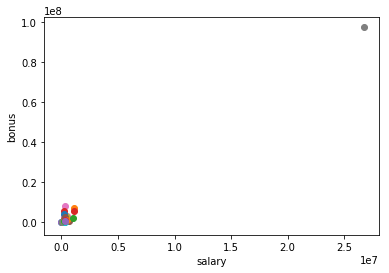

In [110]:
# salary vs. bonus
import sys
import matplotlib.pyplot
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
%matplotlib inline

# read in data dictionary and convert to numpy array
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
features = ["salary", "bonus"]
data = featureFormat(data_dict, features)

# To plot in matplotlib
for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

In [111]:
# To remove NaN's and find maximum bonus 
bonuses = []
for entry in enron_dataset:
    if type (enron_dataset[entry]['bonus']) == int :
        bonuses.append(enron_dataset[entry]['bonus'])
print "Total people with bonus: " + str(len(bonuses))
print "Maximum bonus was " + str(max(bonuses))

Total people with bonus: 81
Maximum bonus was 8000000


In [112]:
# find the employee with the maximum bonus
for entry in enron_dataset:
    if enron_dataset[entry]['bonus'] == 8000000:
        print "Name of person with maximum bonus " + entry

Name of person with maximum bonus LAVORATO JOHN J


Interesting that John Lavorato accumulated an 8 million dollar bonus.  I did some Googling to find out more about this and did find an article from the New York Times here:  https://www.nytimes.com/2002/06/18/business/officials-got-a-windfall-before-enron-s-collapse.html .  It does state that Lavorato received an 8 million dollar bonus before the collapse of Enron.  Since this is an outlier, but one that must be considered, we will leave it in the dataset.

Now that we have looked at bonuses, lets take a graphical look at both salary and bonus.  We want to close in on those with the highest salaries at this point to identify those individuals.

<DO WE NEED ANOTHER CHART LIKE THE ONE BELOW?>

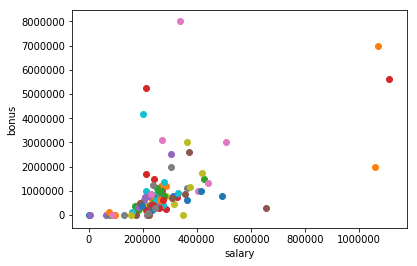

In [113]:
# Comparing Salary versus Bonuses
import sys
import matplotlib.pyplot
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
%matplotlib inline

# Reading in dictionary
data_dict = pickle.load( open("../final_project/final_project_dataset.pkl", "r") )
data_dict.pop('TOTAL', 0)
features = ["salary", "bonus"]
data = featureFormat(data_dict, features)

# To plot in matplotlib
for point in data:
    salary = point[0]
    bonus = point[1]
    matplotlib.pyplot.scatter( salary, bonus )

matplotlib.pyplot.xlabel("salary")
matplotlib.pyplot.ylabel("bonus")
matplotlib.pyplot.show()

In [114]:
# Find the four outliers of employees with highest salary over $6 million
from pprint import pprint
outliers_salary = []
for key in enron_dataset:
    val = enron_dataset[key]['salary']
    if val == 'NaN':
        continue
    outliers_salary.append((key,int(val)))

top_4 = sorted(outliers_salary,key=lambda x:x[1],reverse=True)[:4]

pprint(top_4)

[('SKILLING JEFFREY K', 1111258),
 ('LAY KENNETH L', 1072321),
 ('FREVERT MARK A', 1060932),
 ('PICKERING MARK R', 655037)]


In [115]:
# Are any of these employees identified as POIs?
for people in top_4:
    if enron_dataset[people[0]]['poi'] == 1:
        print people[0]

SKILLING JEFFREY K
LAY KENNETH L


Not a surprise that Skilling and Lay were in this list of the top 4 salaries since they are POIs.

In [116]:
# Combining Lists
def get_total_list(key1, key2):
    'combine 2 lists in one, assign NaN to 0'
    new_list = []
    for i in enron_dataset:
        # assign NaN to 0
        if enron_dataset[i][key1] == 'NaN' or enron_dataset[i][key2] == 'NaN':
            new_list.append(0.)
        elif enron_dataset[i][key1]>=0:
            new_list.append(float(enron_dataset[i][key1]) + float(enron_dataset[i][key2]))
    return new_list

We are now going to find the top number of POI related emails per person.

In [117]:
# Find the total of POI related emails
total_poi_emails = get_total_list('from_this_person_to_poi', 'from_poi_to_this_person')
print poi_name
print str (total_poi_emails)

['HANNON KEVIN P', 'COLWELL WESLEY', 'RIEKER PAULA H', 'KOPPER MICHAEL J', 'SHELBY REX', 'DELAINEY DAVID W', 'LAY KENNETH L', 'BOWEN JR RAYMOND M', 'BELDEN TIMOTHY N', 'FASTOW ANDREW S', 'CALGER CHRISTOPHER F', 'RICE KENNETH D', 'SKILLING JEFFREY K', 'YEAGER F SCOTT', 'HIRKO JOSEPH', 'KOENIG MARK E', 'CAUSEY RICHARD A', 'GLISAN JR BEN F']
[39.0, 0.0, 0.0, 10.0, 53.0, 0.0, 0.0, 84.0, 59.0, 109.0, 27.0, 12.0, 27.0, 50.0, 0.0, 0.0, 251.0, 12.0, 44.0, 0.0, 0.0, 17.0, 445.0, 0.0, 0.0, 177.0, 0.0, 4.0, 0.0, 31.0, 83.0, 0.0, 530.0, 11.0, 0.0, 0.0, 41.0, 0.0, 10.0, 16.0, 27.0, 0.0, 81.0, 939.0, 0.0, 0.0, 0.0, 0.0, 0.0, 39.0, 0.0, 139.0, 51.0, 27.0, 0.0, 119.0, 0.0, 210.0, 286.0, 1.0, 675.0, 0.0, 0.0, 0.0, 0.0, 139.0, 0.0, 35.0, 55.0, 0.0, 0.0, 52.0, 0.0, 0.0, 0.0, 241.0, 155.0, 0.0, 9.0, 0.0, 253.0, 0.0, 336.0, 109.0, 0.0, 0.0, 0.0, 224.0, 46.0, 212.0, 4.0, 0.0, 0.0, 0.0, 118.0, 0.0, 57.0, 0.0, 0.0, 7.0, 0.0, 527.0, 0.0, 29.0, 0.0, 0.0, 112.0, 30.0, 0.0, 0.0, 14.0, 0.0, 40.0, 0.0, 0.0, 1.0, 36

Seems hard to read, so we will just print the top 10 employees who sent emails to POIs.

In [118]:
# Find the top ten employees who sent emails to POIs
from pprint import pprint
outlier_poi_emails = []
for key in enron_dataset:
    val = enron_dataset[key]['from_this_person_to_poi']
    if val == 'NaN':
        continue
    outlier_poi_emails.append((key,int(val)))

top_10 = sorted(outlier_poi_emails,key=lambda x:x[1],reverse=True)[:10]

pprint(top_10)

[('DELAINEY DAVID W', 609),
 ('LAVORATO JOHN J', 411),
 ('KEAN STEVEN J', 387),
 ('BECK SALLY W', 386),
 ('KITCHEN LOUISE', 194),
 ('MCCONNELL MICHAEL S', 194),
 ('KAMINSKI WINCENTY J', 171),
 ('BELDEN TIMOTHY N', 108),
 ('SHANKMAN JEFFREY A', 83),
 ('BUY RICHARD B', 71)]


Now we will see the top 10 employees receiving emails from POIs.

In [119]:
# Find the top ten employees who received emails from POIs
from pprint import pprint
outlier_poi_emails = []
for key in enron_dataset:
    val = enron_dataset[key]['from_poi_to_this_person']
    if val == 'NaN':
        continue
    outlier_poi_emails.append((key,int(val)))

top_10 = sorted(outlier_poi_emails,key=lambda x:x[1],reverse=True)[:10]

pprint(top_10)

[('LAVORATO JOHN J', 528),
 ('DIETRICH JANET R', 305),
 ('KITCHEN LOUISE', 251),
 ('FREVERT MARK A', 242),
 ('COLWELL WESLEY', 240),
 ('BELDEN TIMOTHY N', 228),
 ('REDMOND BRIAN L', 204),
 ('CALGER CHRISTOPHER F', 199),
 ('DONAHUE JR JEFFREY M', 188),
 ('WHALLEY LAWRENCE G', 186)]


In [120]:
# Find the total number of emails per person
total_emails = get_total_list('to_messages', 'from_messages')
print total_emails

[836.0, 0.0, 0.0, 776.0, 1077.0, 0.0, 260.0, 2403.0, 3423.0, 1460.0, 145.0, 129.0, 2489.0, 2685.0, 181.0, 0.0, 1798.0, 152.0, 314.0, 0.0, 0.0, 817.0, 10033.0, 0.0, 0.0, 5902.0, 0.0, 442.0, 0.0, 1647.0, 1410.0, 0.0, 11658.0, 592.0, 0.0, 0.0, 1347.0, 0.0, 978.0, 516.0, 1648.0, 0.0, 2885.0, 9844.0, 0.0, 0.0, 0.0, 679.0, 0.0, 595.0, 0.0, 16364.0, 3279.0, 264.0, 0.0, 788.0, 0.0, 6575.0, 6071.0, 74.0, 6162.0, 0.0, 0.0, 0.0, 0.0, 4309.0, 0.0, 1236.0, 907.0, 0.0, 0.0, 1793.0, 0.0, 0.0, 0.0, 5950.0, 1885.0, 0.0, 952.0, 691.0, 1892.0, 0.0, 8475.0, 916.0, 307.0, 0.0, 70.0, 2742.0, 923.0, 18975.0, 135.0, 0.0, 0.0, 0.0, 3735.0, 0.0, 638.0, 0.0, 0.0, 965.0, 0.0, 19513.0, 553.0, 430.0, 0.0, 0.0, 5097.0, 3272.0, 0.0, 0.0, 1527.0, 0.0, 753.0, 0.0, 0.0, 552.0, 327.0, 1213.0, 0.0, 2237.0, 253.0, 190.0, 0.0, 0.0, 2635.0, 3090.0, 3296.0, 0.0, 0.0, 3710.0, 0.0, 1830.0, 2435.0, 0.0, 515.0, 479.0, 1752.0, 4576.0, 0.0, 1941.0, 562.0, 887.0, 889.0]


# New Feature

I want to take the number of POI emails and divide those by the total number of emails per person to come up with a percentage of overall POI emails.

In [121]:
# Defining the fraction list to find the percentage of poi emails to total emails
def email_fraction(list1, list2):
    'divide one list by other'
    fraction = []
    for i in range(0,len(list1)):
        if list2[i] == 0.0:
            fraction.append(0.0)
                #print list2[j]
                #fraction.append(0.0)
        else:
            fraction.append(float(list1[i])/float(list2[i]))
            #print fraction
    return fraction

In [122]:
# Finding the fraction of POI emails from individuals
fraction_poi_emails = email_fraction(total_poi_emails, total_emails)
print fraction_poi_emails

[0.04665071770334928, 0.0, 0.0, 0.01288659793814433, 0.04921077065923862, 0.0, 0.0, 0.03495630461922597, 0.017236342389716622, 0.07465753424657534, 0.18620689655172415, 0.09302325581395349, 0.010847730012053034, 0.0186219739292365, 0.0, 0.0, 0.13959955506117908, 0.07894736842105263, 0.14012738853503184, 0.0, 0.0, 0.0208078335373317, 0.044353633011063494, 0.0, 0.0, 0.029989833954591663, 0.0, 0.00904977375565611, 0.0, 0.018822100789313904, 0.058865248226950356, 0.0, 0.0454623434551381, 0.018581081081081082, 0.0, 0.0, 0.030438010393466965, 0.0, 0.010224948875255624, 0.031007751937984496, 0.016383495145631068, 0.0, 0.028076256499133447, 0.09538805363673304, 0.0, 0.0, 0.0, 0.0, 0.0, 0.06554621848739496, 0.0, 0.00849425568320704, 0.01555352241537054, 0.10227272727272728, 0.0, 0.15101522842639595, 0.0, 0.03193916349809886, 0.047109207708779445, 0.013513513513513514, 0.10954235637779941, 0.0, 0.0, 0.0, 0.0, 0.03225806451612903, 0.0, 0.02831715210355987, 0.06063947078280044, 0.0, 0.0, 0.0290016

In [123]:
# Adding the new feature to the dataset
count = 0
for i in enron_dataset:
    enron_dataset[i]['fraction_poi_emails'] = fraction_poi_emails[count]
    count += 1

# Testing David W Delainey at random
print 'DELAINEY fraction_poi_emails: ', enron_dataset['DELAINEY DAVID W']['fraction_poi_emails']

DELAINEY fraction_poi_emails:  0.109542356378


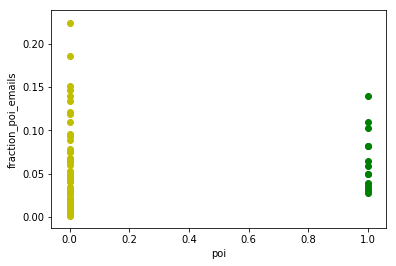

In [124]:
# Checking to see if correlation exists between POIs and fraction of POI emails
new_features_list = ['poi', 'fraction_poi_emails']
data = featureFormat(enron_dataset, new_features_list)

%matplotlib inline

for point in data:
    poi = point[0]
    fraction_poi_emails = point[1]
    #matplotlib.pyplot.boxplot( data )
    if point[0] == 1:
        matplotlib.pyplot.scatter(poi, fraction_poi_emails, color = 'g')
    else:
        matplotlib.pyplot.scatter(poi, fraction_poi_emails, color = 'y')
    #matplotlib.pyplot.boxplot(data)
matplotlib.pyplot.xlabel("poi")
matplotlib.pyplot.ylabel("fraction_poi_emails")
matplotlib.pyplot.show()

We can see that the yellow dots indicate no relationship between fraction of POI emails and POIs, while the green dots indicate correlation between the emails and POIs.  While not a strong relationship, there is some existence of the fraction of poi emails to correlate to POIs.  After consideration, I have decided not to include the new feature in the feature selection.  I did not want overlap with the other email indicators and felt that those are also good indicators of identifying POIs.

# Feature Selection

I wanted to compare the best features of the dataset using two different algorithms.  I decided to compare DecisionTree and SelectKBest to determine what features in the dataset were most important and then run comparisons to see which algorithm was more accurate at predicting POIs.

### DecisionTree with all features

In [125]:
#Loading the scores for comparison of features
import pickle
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
from sklearn.cross_validation import train_test_split
import numpy as np
np.random.seed(42)
from time import time
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#Loading the dataset
data_dict = pickle.load(open("../final_project/final_project_dataset.pkl", "r") )

#Defining the features list
features_list = ['poi','salary', 'from_poi_to_this_person', 'from_this_person_to_poi', 'to_messages', 
                 'deferral_payments', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 
                 'shared_receipt_with_poi', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 
                 'loan_advances', 'from_messages', 'other', 'director_fees', 'deferred_income', 'long_term_incentive']

data = featureFormat(data_dict, features_list)
labels, features = targetFeatureSplit(data)

#Defining the training and testing lists
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.4, random_state = 42)

#Indication to use Decision Tree
from sklearn.tree import DecisionTreeClassifier
t0 = time()
clf = DecisionTreeClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

#Printing accuracy, precision, recall, and run time
from sklearn.metrics import accuracy_score
acc = accuracy_score(labels_test, pred)
print 'Accuracy: ' + (str(acc))
print 'Precision: ', precision_score(labels_test, pred)
print 'Recall: ', recall_score(labels_test, pred)
print 'Decision Tree algorithm run time: ', round(time()-t0, 5), 's'


# list of importance features
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
print 'Feature Ranking: '
for i in range(10):
    print "{} feature {} ({})".format(i+1,features_list[i+1],importances[indices[i]])

Accuracy: 0.844827586207
Precision:  0.333333333333
Recall:  0.125
Decision Tree algorithm run time:  0.00441 s
Feature Ranking: 
1 feature salary (0.337437907714)
2 feature from_poi_to_this_person (0.161410018553)
3 feature from_this_person_to_poi (0.109563164109)
4 feature to_messages (0.101688311688)
5 feature deferral_payments (0.0753246753247)
6 feature total_payments (0.0753246753247)
7 feature exercised_stock_options (0.0564935064935)
8 feature bonus (0.048961038961)
9 feature restricted_stock (0.0337967018319)
10 feature shared_receipt_with_poi (0.0)


Next, let's run SelectKBest to find out what the top ten features are for that algorithm.

### SelectKBest with all features

In [126]:
#Loading the SelectKBest/GridSearchCV/Pipeline to find the best features
import pickle
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
from sklearn.cross_validation import train_test_split
import numpy as np
np.random.seed(42)
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline

#Loading the dataset
data_dict = pickle.load(open("../final_project/final_project_dataset.pkl", "r") )

#Defining the features list
features_list = ['poi', 'salary', 'to_messages', 'deferral_payments', 'total_payments', 'exercised_stock_options', 
                 'bonus', 'restricted_stock', 'shared_receipt_with_poi', 'restricted_stock_deferred', 
                 'total_stock_value', 'expenses', 'loan_advances', 'from_messages', 'other', 'from_this_person_to_poi',
                 'poi', 'director_fees', 'deferred_income', 'long_term_incentive', 'from_poi_to_this_person']

data = featureFormat(data_dict, features_list)
labels, features = targetFeatureSplit(data)

#Defining the training and testing lists
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.4, random_state = 42)

#Indication to use SelectKBest
from sklearn.feature_selection import SelectKBest
selector = SelectKBest(k=10)
selectedFeatures = selector.fit(features,labels)
feature_names = [features_list[i] for i in selectedFeatures.get_support(indices=True)]
print 'Best features: ', feature_names

Best features:  ['salary', 'to_messages', 'deferral_payments', 'total_payments', 'restricted_stock', 'expenses', 'other', 'from_this_person_to_poi', 'poi', 'long_term_incentive']


### DecisionTree after best features identified by DecisionTree

In [127]:
#Loading the scores for comparison of features
import pickle
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
from sklearn.cross_validation import train_test_split
import numpy as np
np.random.seed(42)
from time import time
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#Loading the dataset
data_dict = pickle.load(open("../final_project/final_project_dataset.pkl", "r") )

#Defining the features list
features_list = ['poi', 'deferral_payments', 'salary', 'from_poi_to_this_person', 'to_messages', 
                 'exercised_stock_options','total_payments', 'restricted_stock', 'from_this_person_to_poi', 
                 'shared_receipt_with_poi']

data = featureFormat(data_dict, features_list)
labels, features = targetFeatureSplit(data)

#Defining the training and testing lists
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.4, 
                                                                            random_state = 42)

#Indication to use DecisionTree
from sklearn.tree import DecisionTreeClassifier
t0 = time()
clf = DecisionTreeClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

#Printing accuracy, precision, recall, and run time
from sklearn.metrics import accuracy_score
acc = accuracy_score(labels_test, pred)

print 'Accuracy: ' + str(acc)
print 'Precision: ', precision_score(labels_test, pred)
print 'Recall: ', recall_score(labels_test, pred)
print 'F1 score:', f1_score(labels_test, pred)
print 'Decision Tree algorithm run time: ', round(time()-t0, 5), 's'



Accuracy: 0.758620689655
Precision:  0.2
Recall:  0.25
F1 score: 0.222222222222
Decision Tree algorithm run time:  0.00577 s


Not bad.  Now we are going to see if we can be more accurate with the 10 best features chosen by SelectKBest.

### DecisionTree after best features identified by SelectKBest

In [128]:
#Loading the scores for comparison of features
import pickle
import sys
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
from sklearn.cross_validation import train_test_split
import numpy as np
np.random.seed(42)
from time import time
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#Loading the dataset
data_dict = pickle.load(open("../final_project/final_project_dataset.pkl", "r") )

#Defining the features list
features_list = ['poi', 'deferral_payments', 'salary', 'expenses', 'to_messages', 'other', 
                 'total_payments', 'restricted_stock', 'from_this_person_to_poi', 'long_term_incentive']

data = featureFormat(data_dict, features_list)
labels, features = targetFeatureSplit(data)

#Defining the training and testing lists
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.4, 
                                                                            random_state = 42)

#Indication to use DecisionTree
from sklearn.tree import DecisionTreeClassifier
t0 = time()
clf = DecisionTreeClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

#Printing accuracy, precision, recall, and run time
from sklearn.metrics import accuracy_score
acc = accuracy_score(labels_test, pred)

print 'Accuracy: ' + str(acc)
print 'Precision: ', precision_score(labels_test, pred)
print 'Recall: ', recall_score(labels_test, pred)
print 'F1 score:', f1_score(labels_test, pred)
print 'Decision Tree algorithm run time: ', round(time()-t0, 5), 's'


Accuracy: 0.701754385965
Precision:  0.142857142857
Recall:  0.285714285714
F1 score: 0.190476190476
Decision Tree algorithm run time:  0.00593 s


In comparison, the DecisionTree classifier earned better accuracy over the SelectKBest by about a 5% increase.  The precision was also slightly higher, while the recall was just slightly lower than the SelectKBest.  Due to this, we are going to stick with the features selected by the DecisionTree classifier and use those to tune our set.

# Picking And Tuning An Algorithm

Now that we have picked our top 10 features, we will put those into various algorithms to see which one is the most accurate, along with having good precision, recall, and F1 scores.  I decided to choose DecisionTree, AdaBoost, and Logistic Regression.

### DecisionTree

In [135]:
#Features list
features_list = ['poi', 'deferral_payments', 'salary', 'from_poi_to_this_person', 'to_messages', 
                 'exercised_stock_options','total_payments', 'restricted_stock', 'from_this_person_to_poi', 
                 'shared_receipt_with_poi']
data = featureFormat(data_dict, features_list)
labels, features = targetFeatureSplit(data)

#Splitting data for training and testing
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.4, random_state = 42)

#Indication to use DecisionTree
from sklearn.tree import DecisionTreeClassifier
t0 = time()
clf = DecisionTreeClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

#Printing accuracy, precision, recall, and run time
from sklearn.metrics import accuracy_score
acc = accuracy_score(labels_test, pred)

print 'Accuracy: ' + str(acc)
print 'Precision: ', precision_score(labels_test, pred)
print 'Recall: ', recall_score(labels_test, pred)
print 'F1 score:', f1_score(labels_test, pred)
print 'Random algorithm run time: ', round(time()-t0, 5), 's'

Accuracy: 0.741379310345
Precision:  0.181818181818
Recall:  0.25
F1 score: 0.210526315789
Random algorithm run time:  0.0113 s


### AdaBoost

In [130]:
#Features list
features_list = ['poi', 'deferral_payments', 'salary', 'from_poi_to_this_person', 'to_messages', 
                 'exercised_stock_options','total_payments', 'restricted_stock', 'from_this_person_to_poi', 
                 'shared_receipt_with_poi']
data = featureFormat(data_dict, features_list)
labels, features = targetFeatureSplit(data)

#Splitting data for training and testing
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.4, random_state = 42)

#Indication to use Adaboost
from sklearn.ensemble import AdaBoostClassifier
t0 = time()
clf = AdaBoostClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

#Printing accuracy, precision, recall, and run time
from sklearn.metrics import accuracy_score
acc = accuracy_score(labels_test, pred)

print 'Accuracy: ' + str(acc)
print 'Precision: ', precision_score(labels_test, pred)
print 'Recall: ', recall_score(labels_test, pred)
print 'F1 score:', f1_score(labels_test, pred)
print 'Adaboost algorithm run time: ', round(time()-t0, 5), 's'

Accuracy: 0.706896551724
Precision:  0.0909090909091
Recall:  0.125
F1 score: 0.105263157895
Adaboost algorithm run time:  0.35331 s


### Logistic Regression

In [131]:
#Features list
features_list = ['poi', 'deferral_payments', 'salary', 'from_poi_to_this_person', 'to_messages', 
                 'exercised_stock_options','total_payments', 'restricted_stock', 'from_this_person_to_poi', 
                 'shared_receipt_with_poi']
data = featureFormat(data_dict, features_list)
labels, features = targetFeatureSplit(data)

#Splitting data for training and testing
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.4, random_state = 42)

#Indication to use Logistic Regression
from sklearn.linear_model import LogisticRegression
t0 = time()
clf = LogisticRegression()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

#Printing accuracy, precision, recall, and run time
from sklearn.metrics import accuracy_score
acc = accuracy_score(labels_test, pred)


print 'Accuracy: ' + str(acc)
print 'Precision: ', precision_score(labels_test, pred)
print 'Recall: ', recall_score(labels_test, pred)
print 'F1 score:', f1_score(labels_test, pred)
print 'Logistic regression algorithm run time: ', round(time()-t0, 5), 's'

Accuracy: 0.724137931034
Precision:  0.166666666667
Recall:  0.25
F1 score: 0.2
Logistic regression algorithm run time:  0.0082 s


Our top two most accurate algorithms were DecisionTree and LogisticRegression.  Now, we are going to validate and tune the two models with GridSearch and then see which one produces the best results in the tester.py file.

# Validate and Evaluate

Now we will evaluate the parameters of the algorithms to decide on the best ones to manipulate to get the optimum results in our POI identifier.

### Decision Tree Model under GridSearchCV

In [132]:
from sklearn.grid_search import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
t0 = time()
param_grid = {
         'min_samples_split': range (2, 8),
         'max_depth': range (1, 8),
         'max_features': range(3,10),
         'criterion': ('gini', 'entropy')
          }
clf = GridSearchCV(DecisionTreeClassifier(), param_grid)
clf = clf.fit(features_train, labels_train)

#Printing the best estimator using DecisionTree
print "done in %0.5fs" % (time() - t0)
print "Best estimator found by grid search:"
print clf.best_estimator_

done in 5.59466s
Best estimator found by grid search:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


### Logistic Regression Model under GridSearchCV

In [133]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf = GridSearchCV(LogisticRegression(penalty='l2'), param_grid)
clf = clf.fit(features_train, labels_train)

#Printing the best estimator using LogisticRegression
print "done in %0.5fs" % (time() - t0)
print "Best estimator found by grid search:"
print clf.best_estimator_

done in 5.71372s
Best estimator found by grid search:
LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


Now, we will use the tester.py file to find out the results of the fine tuning of the algorithms and proceed there with the finish.